# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


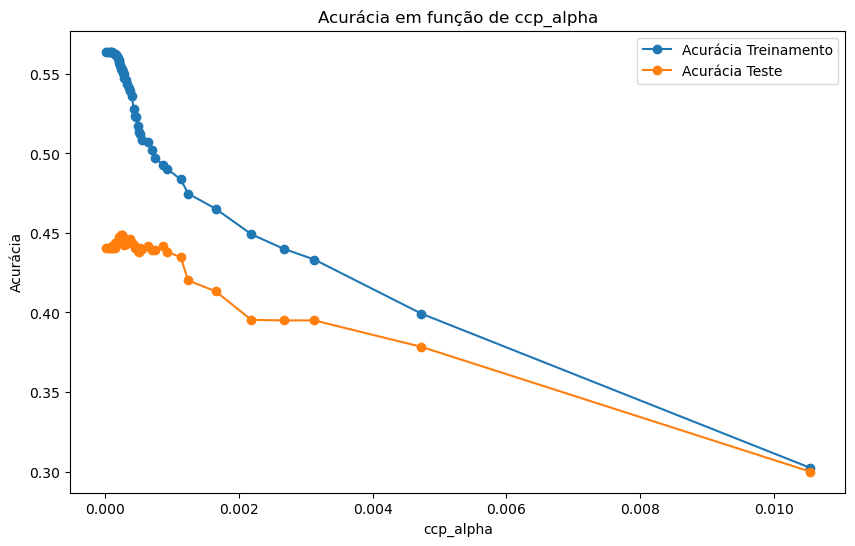

Melhor ccp_alpha: 0.00023944476959803082
Melhor acurácia na base de teste: 0.4486


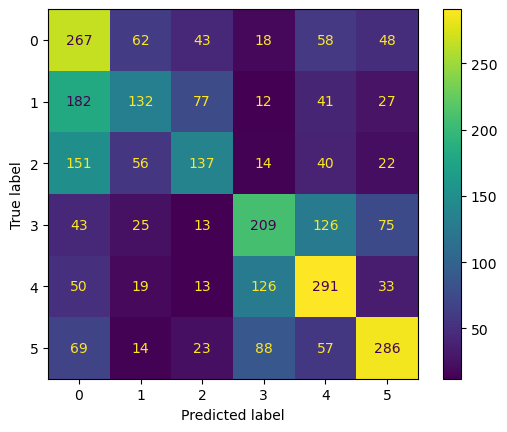

In [24]:
# Carregando as bases de treino e teste:
X_train = pd.read_csv('X_train_selected.csv', index_col=[0, 1])
y_train = pd.read_csv('y_train.txt', header=None, names=['activity'])

X_test = pd.read_csv('X_test_selected.csv', index_col=[0, 1])
y_test = pd.read_csv('y_test.txt', header=None, names=['activity'])

# Ajuste do modelo de árvore de decisão inicial:
clf = DecisionTreeClassifier(min_samples_leaf=20)
clf.fit(X_train, y_train)

# Calculando os valores de ccp_alphas e removendo valores negativos:
path = clf.cost_complexity_pruning_path(X_train, y_train)
alpha_values = path.ccp_alphas  # Alterado o nome da variável para 'alpha_values'
ccp_alphas = alpha_values[alpha_values > 0]  # Filtrando apenas valores positivos
ccp_alphas = np.unique(ccp_alphas)[::5]  # Selecionando 1 a cada 5 valores de ccp_alpha

# Ajustando o modelo de árvore para cada valor de ccp_alpha:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Avaliando o desempenho de cada árvore:
train_accuracies = []
test_accuracies = []

for clf in clfs:
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plotando as acurácias em função de ccp_alpha:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_accuracies, marker='o', label='Acurácia Treinamento')
plt.plot(ccp_alphas, test_accuracies, marker='o', label='Acurácia Teste')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia em função de ccp_alpha')
plt.legend()
plt.show()

# Selecionando o melhor valor de ccp_alpha baseado na acurácia do teste:
best_index = np.argmax(test_accuracies)
best_ccp_alpha = ccp_alphas[best_index]
best_test_accuracy = test_accuracies[best_index]

print(f"Melhor ccp_alpha: {best_ccp_alpha}")
print(f"Melhor acurácia na base de teste: {best_test_accuracy:.4f}")

# Treinando a melhor árvore de decisão com o melhor ccp_alpha:
best_clf = clfs[best_index]

# Avaliando o modelo na base de teste e plotando a matriz de confusão:
y_pred = best_clf.predict(X_test)

# Calculando a matriz de confusão:
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [26]:
# Dividindo a base de treino em treino e validação (25% para validação)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

# Exibindo as dimensões das novas bases
print(f"Tamanho da base de treino: {X_train_split.shape}")
print(f"Tamanho da base de validação: {X_val_split.shape}")


Tamanho da base de treino: (5514, 3)
Tamanho da base de validação: (1838, 3)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

As 3 variáveis mais importantes são:
             feature  importance
0  tBodyAcc-mean()-X    0.712110
1  tBodyAcc-mean()-Y    0.222871
2  tBodyAcc-mean()-Z    0.065019


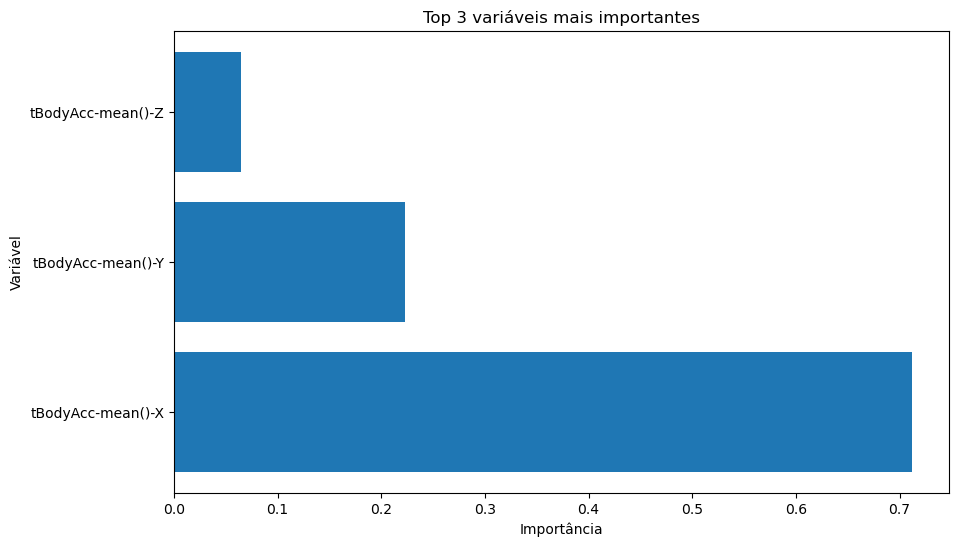

In [28]:
# Ajustando a árvore de decisão com profundidade máxima = 4:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_split, y_train_split)

# Exibindo as importâncias das variáveis:
importances = clf.feature_importances_

# Criando um DataFrame para organizar as variáveis e suas importâncias:
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

# Ordenando as variáveis por importância:
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Exibindo as 3 variáveis mais importantes:
top_3_features = feature_importance_df.head(3)
print("As 3 variáveis mais importantes são:")
print(top_3_features)

# Plotando a importância das variáveis:
plt.figure(figsize=(10, 6))
plt.barh(top_3_features['feature'], top_3_features['importance'])
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Top 3 variáveis mais importantes')
plt.show()


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [ ]:
%%time

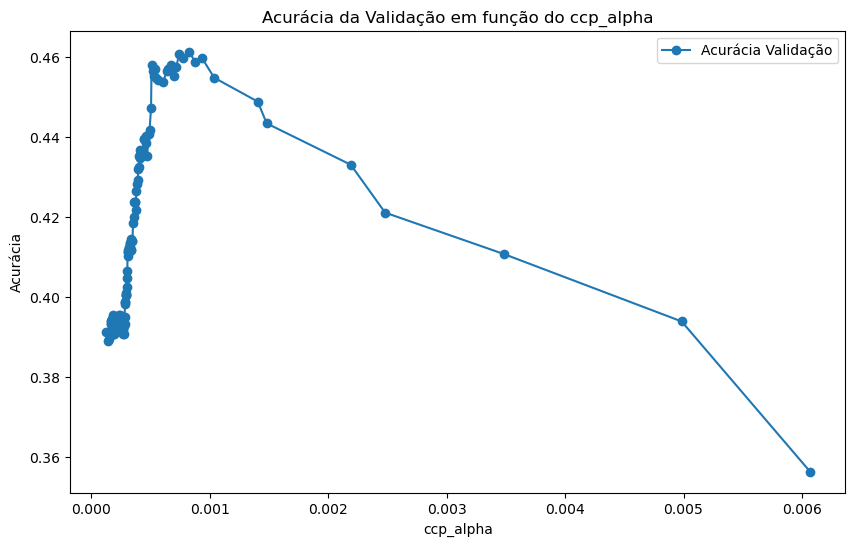

Melhor ccp_alpha: 0.0008294558994178434
Melhor acurácia na base de validação: 0.4614
Acurácia na base de teste com o melhor ccp_alpha: 0.4421


In [32]:
# Selecionando as 3 melhores variáveis:
top_3_vars = top_3_features['feature'].tolist()

# Certificando-se de que o número de linhas dos conjuntos de dados correspondem:
X_train_top3 = X_train_split[top_3_vars]
X_val_top3 = X_val_split[top_3_vars]

# Ajustando a árvore de decisão com todas as 3 variáveis e sem poda para encontrar os ccp_alphas:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_top3, y_train_split)

# Calculando os valores de ccp_alphas e removendo valores negativos:
path = clf.cost_complexity_pruning_path(X_train_top3, y_train_split)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[ccp_alphas > 0]  # Filtrar apenas valores positivos
ccp_alphas = np.unique(ccp_alphas)[::5]  # Selecionar 1 a cada 5 valores de ccp_alpha

# Ajustando uma árvore de decisão para cada valor de ccp_alpha:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_top3, y_train_split)
    clfs.append(clf)

# Avaliando a acurácia da base de validação para cada modelo:
val_accuracies = []
for clf in clfs:
    y_val_pred = clf.predict(X_val_top3)
    val_acc = accuracy_score(y_val_split, y_val_pred)
    val_accuracies.append(val_acc)

# Plotando a acurácia em função dos ccp_alphas:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, val_accuracies, marker='o', label='Acurácia Validação')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia da Validação em função do ccp_alpha')
plt.legend()
plt.show()

# Selecionando o melhor ccp_alpha (com maior acurácia):
best_index = np.argmax(val_accuracies)
best_ccp_alpha = ccp_alphas[best_index]
best_val_accuracy = val_accuracies[best_index]

# Exibindo o melhor ccp_alpha e sua acurácia correspondente:
print(f"Melhor ccp_alpha: {best_ccp_alpha}")
print(f"Melhor acurácia na base de validação: {best_val_accuracy:.4f}")

# Ajustando a árvore de decisão com o melhor ccp_alpha:
best_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
best_clf.fit(X_train_top3, y_train_split)

# Avaliando a árvore final na base de teste:
X_test_top3 = X_test[top_3_vars]
y_test_pred = best_clf.predict(X_test_top3)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Acurácia na base de teste com o melhor ccp_alpha: {test_accuracy:.4f}")


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia na base de teste: 0.4421


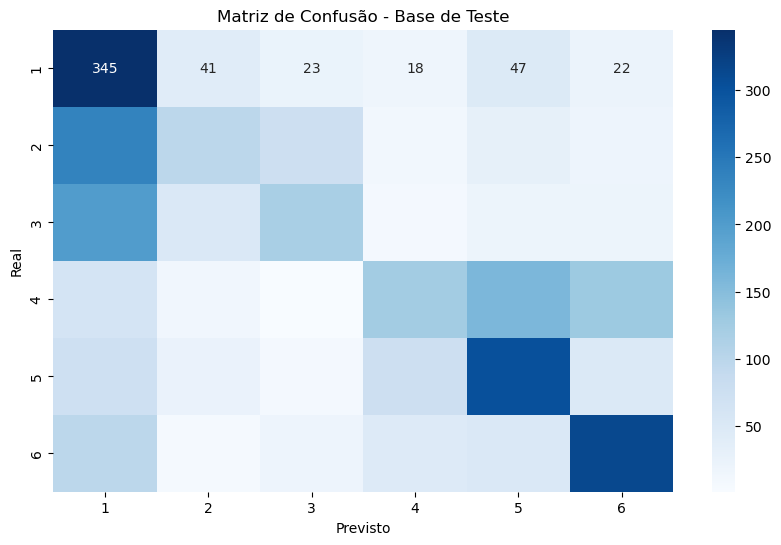


Relatório de Classificação na Base de Teste:
              precision    recall  f1-score   support

           1       0.34      0.70      0.46       496
           2       0.42      0.21      0.28       471
           3       0.48      0.28      0.36       420
           4       0.44      0.25      0.32       491
           5       0.49      0.57      0.53       532
           6       0.57      0.58      0.58       537

    accuracy                           0.44      2947
   macro avg       0.46      0.43      0.42      2947
weighted avg       0.46      0.44      0.43      2947



In [41]:
# Previsão na base de teste com o melhor modelo:
y_test_pred = best_clf.predict(X_test_top3)

# Avaliando a acurácia:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia na base de teste: {test_accuracy:.4f}")

# Matriz de confusão:
cm = confusion_matrix(y_test, y_test_pred)

# Exibindo a matriz de confusão com heatmap:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()

# Relatório de classificação:
print("\nRelatório de Classificação na Base de Teste:")
print(classification_report(y_test, y_test_pred))


______________________